In [3]:
import os
import json
import torchvision
import matplotlib.pyplot as plt
from matplotlib import patches
from IPython import display
import data_management as dm

# 기본 경로 설정
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(ROOT_DIR, "data")
IMAGE_DIR = os.path.join(DATA_DIR, "train_images")
ANNOT_DIR = os.path.join(DATA_DIR, "train_annotations")

full_dict_path = os.path.join(DATA_DIR, "FULL_DICT.json")
err_txt_path = os.path.join(DATA_DIR, "err_image_paths.txt")
fixed_dict_path = os.path.join(DATA_DIR, "FIXED_DICT.json")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

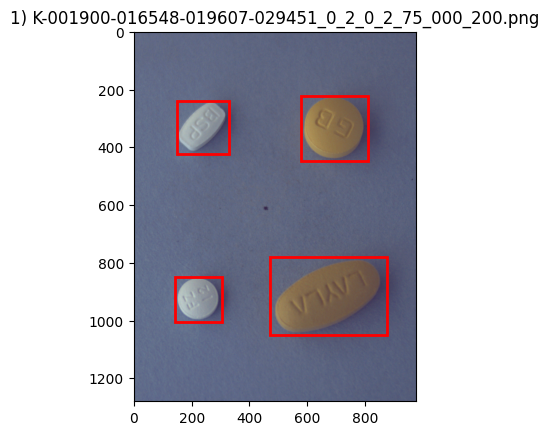

['K-001900-016548-019607-029451_0_2_0_2_70_000_200.png']
['K-001900-016548-019607-033009_0_2_0_2_70_000_200.png', 'K-003351-016262-018357_0_2_0_2_75_000_200.png', 'K-003351-020014-020238_0_2_0_2_90_000_200.png', 'K-003351-020238-031863_0_2_0_2_70_000_200.png', 'K-003351-029667-031863_0_2_0_2_70_000_200.png']
['K-001900-016548-019607-033009_0_2_0_2_70_000_200.png', 'K-003351-016262-018357_0_2_0_2_75_000_200.png', 'K-003351-020014-020238_0_2_0_2_90_000_200.png', 'K-003351-020238-031863_0_2_0_2_70_000_200.png', 'K-003351-029667-031863_0_2_0_2_70_000_200.png', 'K-001900-016548-019607-029451_0_2_0_2_70_000_200.png']


In [ ]:
FULL_DICT = dm.load_full_dict()
err_image_paths = dm.load_err_image_paths()

index = 0
new_err_list = []

image_paths = list(FULL_DICT.keys())


while index < len(image_paths):

    image_path = image_paths[index]

    if image_path in err_image_paths:
        index += 1

    else:
        bbox = []

        for annot_path in FULL_DICT[image_path]:
            with open(os.path.join(ANNOT_DIR, annot_path), 'r', encoding='utf-8') as f:
                json_data = json.load(f)
            bbox.append({
                            "bbox": json_data["annotations"][0]["bbox"],
                            "label": json_data["images"][0]["drug_N"]
                            })

        image = torchvision.io.read_image(os.path.join(IMAGE_DIR, image_path)).permute(1,2,0)


        _, ax = plt.subplots()

        plt.title(f"{index}) {image_path}")
        plt.imshow(image)

        for bbox_dict in bbox:
            x, y, w, h = bbox_dict["bbox"][0], bbox_dict["bbox"][1], bbox_dict["bbox"][2], bbox_dict["bbox"][3]
            rectangle = patches.Rectangle((x, y), w, h, color="red", fill=False, linewidth=2)
            ax.add_patch(rectangle)

        plt.show()

        a = input("0번으로 종료 / enter로 넘어가기 / 1번으로 에러 저장")

        if a == "":
            display.clear_output(wait=True)
            display.display(plt.gcf())
            index += 1

        elif a == "0":
            break

        elif a == "1":
            new_err_list.append(image_path)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            index += 1


err_image_paths.extend(new_err_list)

with open(err_txt_path, "w", encoding="utf-8") as f:
    for item in err_image_paths:
        f.write(item + "\n")